# Classification
In this notebook we will explore linear models for classification, and in particular Logistic Regression. We will introduce this linear model because it can be generalized to nonlinear models using deep neural networks.

## Logistic Regression
We've already seen how to formulate the maximum likelihood (ML) estimation of the parameters of the model for a classification problem. In particular we distinguished the two cases of binary classification and multi-class classification. We will again address the two cases separately. 

### Binary classification
In binary classification we have a dataset of tuples:
$$
D = \{(x_i,y_i) | \quad i\in\{1,...,N\}, \quad x_i \in R^D, \quad  y_i \in\{0,1\}\}
$$
We want our model to approximate the true distribution $p(y|x)$ with the parametric distribution:
$$
p_{model}(y_i|x_i;\Theta) = p_i^{y_i}(1-p_i)^{(1-y_i)} \quad \text{with} \quad p_i = f(x_i;\Theta)
$$
Then we classify new instances thresholding the output of the model:
$$
\text{pred}(x_i) = \begin{cases}
0 \quad \text{if} \quad p_i = f(x_i;\Theta) < 0.5 \\
1 \quad \text{if} \quad p_i = f(x_i;\Theta) \ge 0.5
\end{cases}
$$
In the case of logistic regression we restrict ourself to a linear model. In particular, as we saw in the previous lecture, we want a linear decision surface $y = \mathbf{w}^T\mathbf{x}$ such that:
$$
\text{pred}(x_i) = \begin{cases}
0 \quad \text{if} \quad \mathbf{w}^T\mathbf{x} < 0 \\
1 \quad \text{if} \quad \mathbf{w}^T\mathbf{x} \ge 0
\end{cases}
$$
This can be achieved by using the linear model $y = \mathbf{w}^T\mathbf{x}$ and squashing the output into the interval $[0,1]$ by using a sigmoid function:
$$
\sigma(a) = \frac{1}{1+e^{-a}}
$$

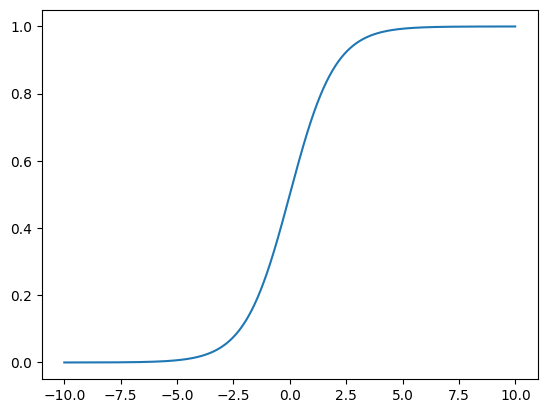

In [1]:
# lets graph the sigmoid function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

a = np.arange(-10,10,0.01)
y = sigmoid(a)
plt.plot(a,y)
plt.show()


In particular if we define:
$$
p_i = f(\mathbf{x_i};\Theta) = \sigma(\mathbf{w}^T\mathbf{x_i})
$$
we obtain:
$$
\text{pred}(x_i) = \begin{cases}
0 \quad \text{if} \quad p_i = \frac{1}{1+e^{-\mathbf{w}^T\mathbf{x_i}}} < 0.5 \rightarrow 1+e^{-\mathbf{w}^T\mathbf{x_i}} > 2 \rightarrow e^{-\mathbf{w}^T\mathbf{x_i}} > 1 \rightarrow -\mathbf{w}^T\mathbf{x_i} > 0 \rightarrow \mathbf{w}^T\mathbf{x_i} < 0 \\
1 \quad \text{if} \quad p_i = \frac{1}{1+e^{-\mathbf{w}^T\mathbf{x_i}}} \ge 0.5 \rightarrow 1+e^{-\mathbf{w}^T\mathbf{x_i}} \le 2 \rightarrow e^{-\mathbf{w}^T\mathbf{x_i}} \le 1 \rightarrow -\mathbf{w}^T\mathbf{x_i} \le 0 \rightarrow \mathbf{w}^T\mathbf{x_i} \ge 0 \\
\end{cases}
$$

We have already seen the MLE for the parameters $\Theta$:
$$
\Theta_{ML} = \begin{matrix}\text{argmin}\\ \Theta\end{matrix} -\sum_{i=1}^N y_i log(p_i) + (1-y_i)log(1-p_i)
$$
Hence by substituting $p_i = \sigma(\mathbf{w}^T\mathbf{x_i})$ we obtain the following loss function:
$$
L(\textbf{w}) = -\sum_{i=1}^N y_i log(\sigma(\mathbf{w}^T\mathbf{x_i})) + (1-y_i)log(1-\sigma(\mathbf{w}^T\mathbf{x_i}))
$$
We are still in the case that L is a convex function (you can look at the second derivatives to verify that this is true) with respect to the parameters $\mathbf{w}$ but if we take the derivative with respect to the parameters and equal to zero we find that no closed form exist.
Let us first compute the gradient (I used [wolfram alpha](https://www.wolframalpha.com/)):
$$
\frac{\partial L}{\partial \mathbf{w}} = - \sum_{i=1}^N \frac{\mathbf{x_i} ((y_i-1)e^{\sigma(\mathbf{w}^T\mathbf{x_i})} + y_i)}{e^{\sigma(\mathbf{w}^T\mathbf{x_i})}+1}
$$
That after some simplifications (using the fact that $\sigma(-a) = 1-\sigma(a)$) becomes:
$$
\begin{align}
\frac{\partial L}{\partial \mathbf{w}} =& - \sum_{i=1}^N \frac{\mathbf{x_i} ((y_i-1)e^{\sigma(\mathbf{w}^T\mathbf{x_i})} + y_i)}{e^{\sigma(\mathbf{w}^T\mathbf{x_i})}+1} =\\
& -\sum_{i=1}^N \mathbf{x_i} [ (y_i -1)\sigma(\mathbf{w}^T\mathbf{x_i}) + y_i\sigma (-\mathbf{w}^T\mathbf{x_i}) ] =\\
& -\sum_{i=1}^N \mathbf{x_i} [ (y_i -1)\sigma(\mathbf{w}^T\mathbf{x_i}) + (1-\sigma (\mathbf{w}^T\mathbf{x_i})y_i) ] =\\
& -\sum_{i=1}^N \mathbf{x_i} [y_i\sigma(\mathbf{w}^T\mathbf{x_i})-\sigma(\mathbf{w}^T\mathbf{x_i})+y_i-y_i\sigma(\mathbf{w}^T\mathbf{x_i})] =\\
& -\sum_{i=1}^N \mathbf{x_i}(y_i - \sigma(\mathbf{w}^T\mathbf{x_i}))
\end{align}
$$


We've seen that the gradient:
$$
\frac{\partial L}{\partial \mathbf{w}} = -\sum_{i=1}^N \mathbf{x_i}(y_i - \sigma(\mathbf{w}^T\mathbf{x_i}))
$$
is a nonlinear function of the parameters $\mathbf{w}$ and no closed form solution exists for the equation
$$
\frac{\partial L}{\partial \mathbf{w}} = 0
$$
Hence we need to proceed with nonlinear optimization methods. The simplest one we have studied is the gradient descent, that updates the parameters according to the formula:
$$
\mathbf{w_{new}} = w_{old} - \eta \frac{\partial L}{\partial \mathbf{w}}
$$
Now let us implement the optimization in Python.

#### Dataset
First we neeed to create the dataset. For simplicity we create a 2D dataset ( $x\in R^2$ ) where the points comes from two multivariate gaussian distributions with different mean and same covariance matrix

In [2]:
N = 100
m1 = [1.,2.]
m2 = [2.,1.]
cov = np.asarray([[.4, .5],
        [.5, .01]])
cov = cov @ np.transpose(cov)
X_1 = np.random.multivariate_normal(mean=m1,cov=cov,size=N//2)
X_2 = np.random.multivariate_normal(mean=m2,cov=cov,size=N//2)

X_1.shape

(50, 2)

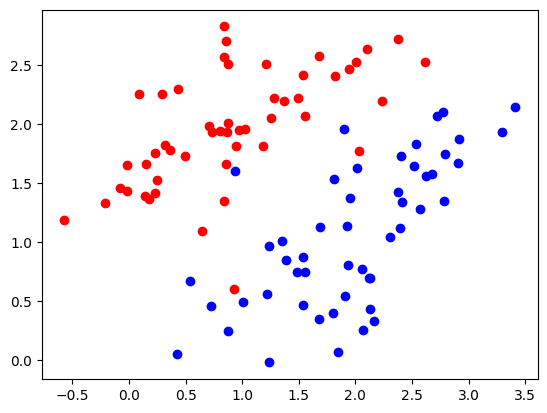

In [3]:
fig,ax = plt.subplots()
ax.scatter(x=X_1[:,0],y=X_1[:,1],c="r")
ax.scatter(x=X_2[:,0],y=X_2[:,1],c="b")
plt.show()

We can write the gradient w.r.t. the model parameters in matrix form. To do that we need to define the matrix $\mathbb{X}$ with all the points (we add also a column of ones to write the predictions as a linear function instead of an affine function). Since we are in 2D we can call the first dimension x and the second dimension y to ease the notation (in more than three dimensions usually the axis are referred through indexes: $x_1$, $x_2$, ..., $x_n$).
$$
\mathbb{X} = \begin{pmatrix}
1 & x_1 & y_1 \\
1 & x_2 & y_2 \\
. & . & .\\
. & . & .\\
1 & x_n & y_n
\end{pmatrix}
$$
Then we define the vector with the model parameters as:
$$
\mathbf{w} = \begin{pmatrix}
w_1 \\ w_2 \\ w_3
\end{pmatrix}
$$
In this way the predictions can be computed as
$$
\hat{y} = \mathbb{X}\mathbf{w} = \begin{pmatrix}
w_1 + w_2 x_1 + w_3 y_1 \\
w_1 + w_2 x_2 + w_3 y_2 \\
... \\
w_1 + w_2 x_n + w_3 y_n
\end{pmatrix}
$$
$$
\sigma(\hat{y}) = \begin{pmatrix}
\sigma (w_1 + w_2 x_1 + w_3 y_1) \\
\sigma (w_1 + w_2 x_2 + w_3 y_2) \\
... \\
\sigma (w_1 + w_2 x_n + w_3 y_n)
\end{pmatrix} = \begin{pmatrix}
p_1 \\ p_2 \\ ... \\ p_n
\end{pmatrix}
$$

First we initialize the parameters of the model at random and plot the decision surface before training.
Remember that the decision surface is the D-1 dimensional hyperplane obtained as:
$$
y(\mathbf{x}) = \mathbf{w}^T\mathbf{x} = 0
$$
That in our case (D = 2) is the line (1D plane) with equation:
$$
w_1 + w_2 x + w_3 y = 0
$$
Or in explicit form
$$
y = -\frac{w_2}{w_3}x - \frac{w_1}{w_3}
$$

In [4]:
w = np.random.normal(size=3)
w

array([-0.88778163, -0.47636985, -1.1088251 ])

In [5]:
X = np.concatenate([X_1,X_2],axis=0)
X = np.concatenate([
    np.ones(shape=(X.shape[0],1)),
    X
],axis=1)
X.shape

(100, 3)

In [6]:
y_pred = X @ w
y_pred.shape

(100,)

In [7]:
def dec_surface(x,w):
    m = -w[1]/w[2]
    q = -w[0]/w[2]
    y = m*x+q
    return y

In [8]:
# since we want to express the dec_surface is explicit
# form y = mx + q, we need to take some points in the
# x axis and plot the corresponding y. In particular
# we take equally spaced points between the maximum
# and minimum values in the second column of the 
# matrix X
x_max = max(X[:,1])
x_min = min(X[:,1])
x = np.arange(x_min,x_max,0.5)
x.shape

(8,)

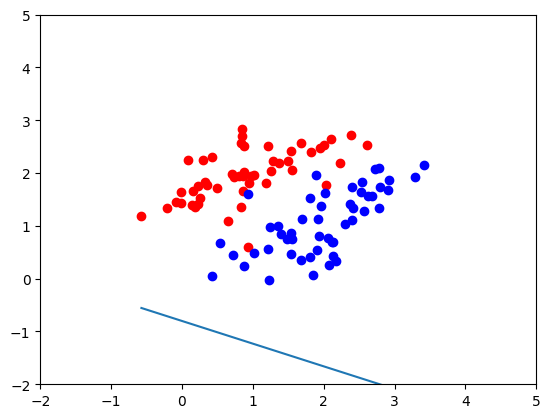

In [9]:
fig,ax = plt.subplots()
ax.scatter(x=X_1[:,0],y=X_1[:,1],c="r")
ax.scatter(x=X_2[:,0],y=X_2[:,1],c="b")
plt.plot(x,dec_surface(x,w))
plt.xlim([-2, 5])
plt.ylim([-2, 5])
plt.show()

Then we apply gradient descent:
$$
\mathbf{w_{new}} = w_{old} - \eta \frac{\partial L}{\partial \mathbf{w}}
$$
with:
$$
\frac{\partial L}{\partial \mathbf{w}} = -\sum_{i=1}^N \mathbf{x_i}(y_i - \sigma(\mathbf{w}^T\mathbf{x_i}))
$$
untill the difference between $\mathbf{w_{new}}$ and $\mathbf{w_{old}}$ is below a fixed threshold:
$$
|\mathbf{w_{new}} - \mathbf{w_{old}}| < \epsilon
$$

In [10]:
# first create the vector with the true classes, we have that the first half 
# of the points in X belongs to class 0 while the other half belongs to class
# 1
y_true = np.concatenate([
    np.zeros(shape=X_1.shape[0]),
    np.ones(shape=X_2.shape[0])
],axis=0)
y_true.shape

(100,)

In [11]:
def gradient(X,w,y_true):
    y_pred = X @ w
    o = y_true-sigmoid(y_pred)
    o = o[...,None]
    o = o*X
    grad = - np.sum(o,axis=0,keepdims=False)
    return grad

In [12]:
eps = 10**-2
eta = 10**-1
w_old = np.zeros_like(w)
w_new = w
step = 0

update model parameters untill convergence, and each time plot the line.

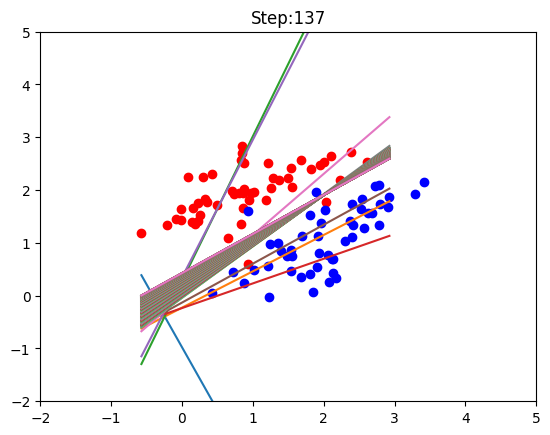

In [13]:
fig,ax = plt.subplots()
ax.set_xlim([-2, 5])
ax.set_ylim([-2, 5])
ax.scatter(x=X_1[:,0],y=X_1[:,1],c="r")
ax.scatter(x=X_2[:,0],y=X_2[:,1],c="b")
while np.linalg.norm(w_old-w_new) > eps and step < 1000:
    w_old = w_new
    grad = gradient(X,w_old,y_true)
    w_new = w_old - eta*grad
    step +=1
    ax.plot(x,dec_surface(x,w_new))
    ax.set_title(f"Step:{step}")
    fig.canvas.draw()
plt.show()


After convergence we can plot the optimal decision surface.

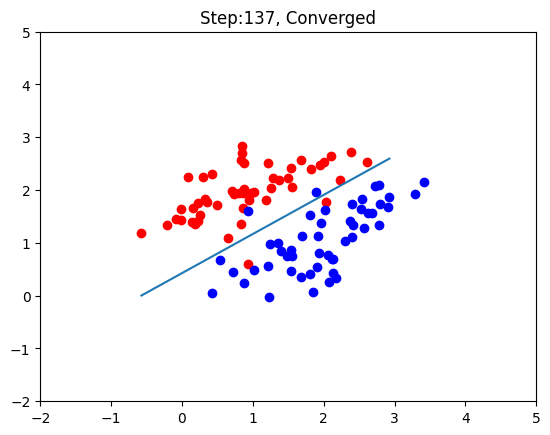

In [14]:
fig,ax = plt.subplots()
ax.scatter(x=X_1[:,0],y=X_1[:,1],c="r")
ax.scatter(x=X_2[:,0],y=X_2[:,1],c="b")
ax.plot(x,dec_surface(x,w_new))
ax.set_xlim([-2, 5])
ax.set_ylim([-2, 5])
ax.set_title(f"Step:{step}, Converged")
plt.show()

Here you can visualize how the decision surface changes after each update of the parameters. Run the cell below to start the animation.

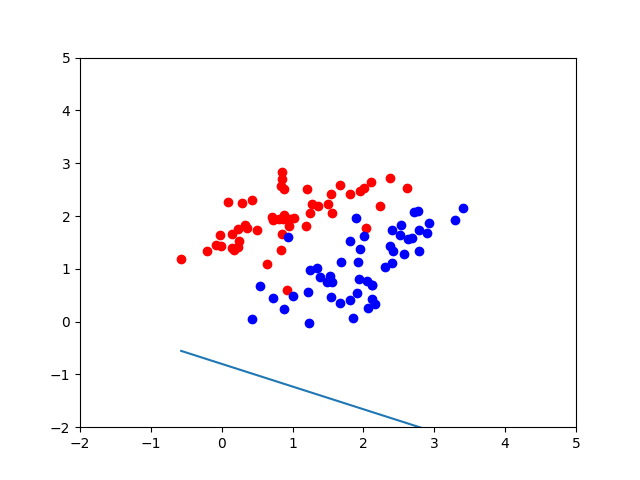

In [15]:
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
from functools import partial
fig,ax = plt.subplots()
ax.set_xlim([-2, 5])
ax.set_ylim([-2, 5])
ax.scatter(x=X_1[:,0],y=X_1[:,1],c="r")
ax.scatter(x=X_2[:,0],y=X_2[:,1],c="b")

args = [
    np.zeros_like(w), # w_old
    w                 # w_new
]
ln, =ax.plot(x,dec_surface(x,args[1]))

def init():
    return ln,

def update(frame):
    args[0] = args[1]
    grad = gradient(X,args[0],y_true)
    args[1] = args[0] - eta*grad
    ln.set_data(x,dec_surface(x,args[1]))
    return ln,

ani = FuncAnimation(
    fig, 
    update, 
    frames=np.linspace(0, step),
                    init_func=init, blit=False,interval=500)
plt.show()
